### Global Internet users

##### Global Internet users dataseti ustida tahlil olib boramiz birinchi navbatda datasetimizni uqib olamiz va kerakliy kutubxonalarni chaqiramiz

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df = pd.read_csv('Final.csv')
df.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


##### Cellular Subscription va Internet Users(%) orasida scatter plot yaratib kuramiz

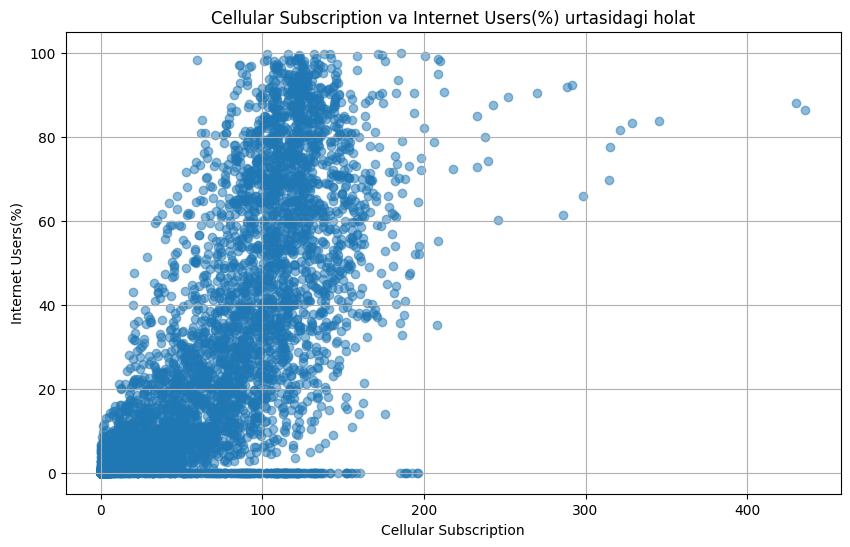

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cellular Subscription'], df['Internet Users(%)'], alpha=0.5)
plt.title('Cellular Subscription va Internet Users(%) urtasidagi holat')
plt.xlabel('Cellular Subscription')
plt.ylabel('Internet Users(%)')
plt.grid(True)
plt.show()

##### Internet Users(%) ning taqsimotini kurish

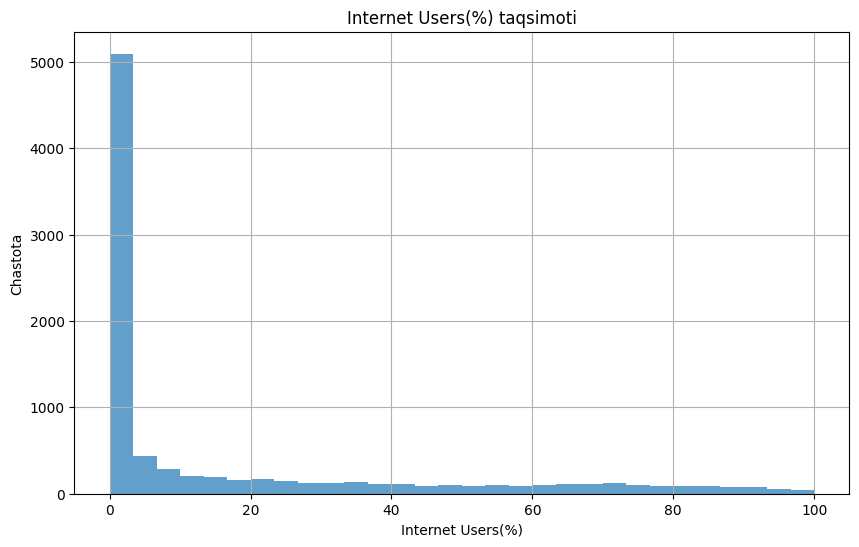

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Internet Users(%)'], bins=30, alpha=0.7)
plt.title('Internet Users(%) taqsimoti')
plt.xlabel('Internet Users(%)')
plt.ylabel('Chastota')
plt.grid(True)
plt.show()

#### Tanlangan yillar uchun o'rtacha Broadband Subscription ni ko'rsatadigan bar chart

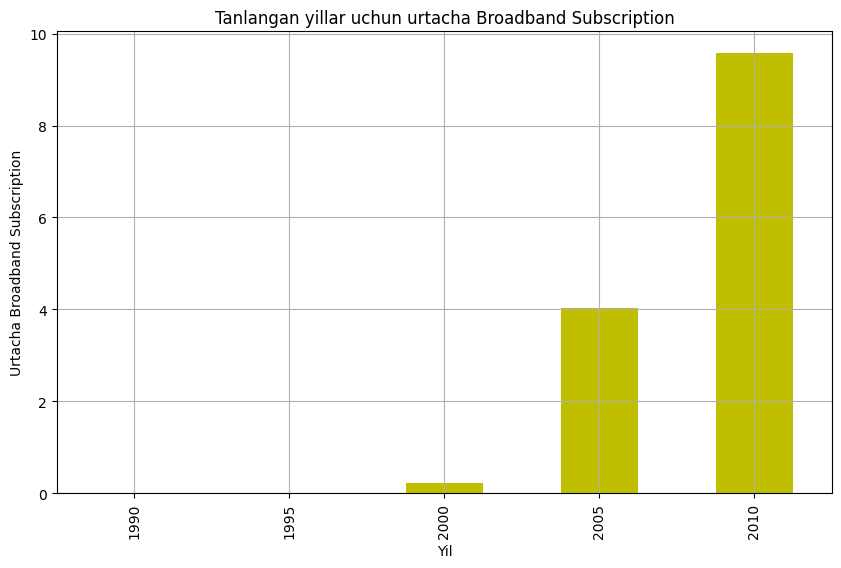

In [13]:
sort_df = df[df['Year'].isin([1990, 1995, 2000, 2005, 2010])]
broadband = sort_df.groupby('Year')['Broadband Subscription'].mean()

plt.figure(figsize=(10, 6))
broadband.plot(kind='bar', color='y')
plt.title('Tanlangan yillar uchun urtacha Broadband Subscription')
plt.xlabel('Yil')
plt.ylabel('Urtacha Broadband Subscription')
plt.grid(True)
plt.show()

##### Qaysi yillarda kuproq malakatlar internetdan foydalanishni boshlagan

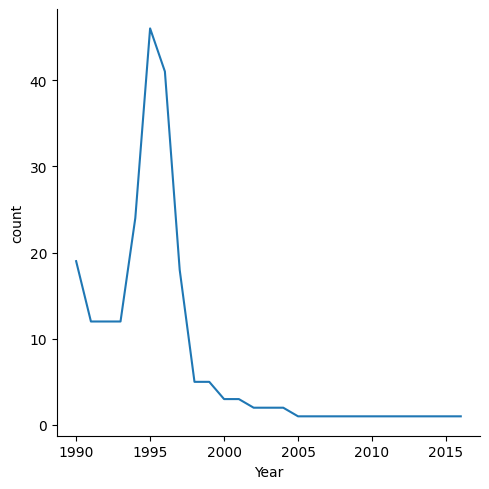

In [14]:
on_world = df[(df['Code'] != 'Region') & (df['Entity'] != 'World') & (df['No. of Internet Users'] > 0)]
mini_year = on_world.groupby('Entity')[['Year']].agg('min')
year_count = mini_year[['Year']].value_counts().reset_index(name='count')
sns.relplot(x='Year',
            y='count',
            data=year_count,
            kind='line')

#### 2020-chi yil uchun internet foydalanuvchilari xaritada

###### Bu kod internetdagi ma'lumotlar va CHatGPT yordamida yozildi

In [15]:
df_2020 = df[(df['Year'] == 2020) & (df['Code'] != 'Region')]
mini_count = df_2020['No. of Internet Users'].min()
fig = px.choropleth(df_2020, 
                    locations='Code', 
                    color='No. of Internet Users', 
                    hover_name='Entity', 
                    color_continuous_scale='YlGnBu',
                    range_color=(mini_count, 1000000000))

fig.update_layout(
    title_text='2020 chi yil uchun internet foydalanuvchilari soni',
    coloraxis_colorbar=dict(
        title='Internet foydalanavchilari soni',
        dtick=50000000))